# Exploratory data analysis on Madelon dataset

## Data structure

In [9]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

madelon = fetch_openml(name='madelon', version=1)

df = pd.DataFrame(data=madelon.data, columns=madelon.feature_names)
df['target'] = madelon.target

print(df.shape)
print(df.head())

(2600, 501)
    V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V492  V493  V494  \
0  485  477  537  479  452  471  491  476  475  473  ...   481   477   485   
1  483  458  460  487  587  475  526  479  485  469  ...   478   487   338   
2  487  542  499  468  448  471  442  478  480  477  ...   481   492   650   
3  480  491  510  485  495  472  417  474  502  476  ...   480   474   572   
4  484  502  528  489  466  481  402  478  487  468  ...   479   452   435   

   V495  V496  V497  V498  V499  V500  target  
0   511   485   481   479   475   496       2  
1   513   486   483   492   510   517       2  
2   506   501   480   489   499   498       2  
3   454   469   475   482   494   461       1  
4   486   508   481   504   495   511       1  

[5 rows x 501 columns]


## Basic statistics and info

In [3]:
print(df.describe())

                V1           V2           V3           V4           V5  \
count  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000   
mean    481.742308   483.551154   509.338846   483.364615   500.925769   
std       6.312905    30.338955    38.798710     8.943204    41.356829   
min     462.000000   377.000000   370.000000   453.000000   360.000000   
25%     478.000000   464.000000   484.000000   477.000000   474.000000   
50%     482.000000   484.000000   509.000000   483.000000   500.000000   
75%     486.000000   504.000000   535.000000   489.000000   527.000000   
max     503.000000   610.000000   654.000000   519.000000   688.000000   

                V6           V7           V8           V9          V10  ...  \
count  2600.000000  2600.000000  2600.000000  2600.000000  2600.000000  ...   
mean    479.351923   480.488462   476.569615   487.016154   478.806538  ...   
std       6.896949    40.428218     1.391642    15.277242     7.308349  ...   
min     459.00000

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, V1 to target
dtypes: category(1), int64(500)
memory usage: 9.9 MB
None


In [33]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values != 0]
columns_with_missing_values

Series([], dtype: int64)

## Distribution and correlation

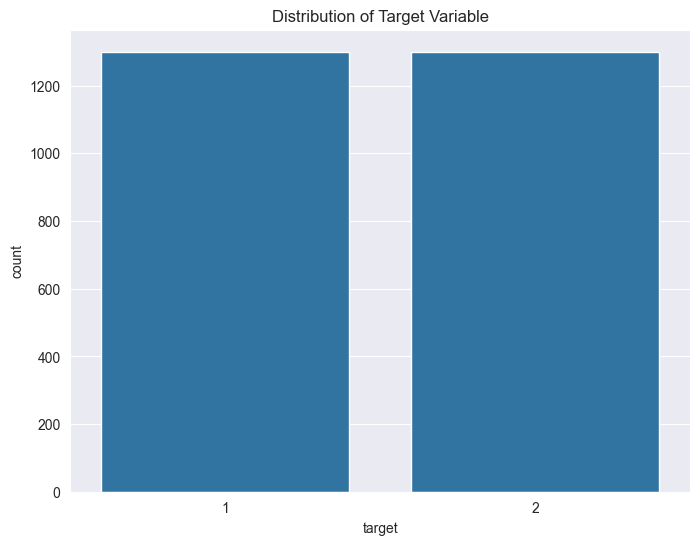

In [34]:
# Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

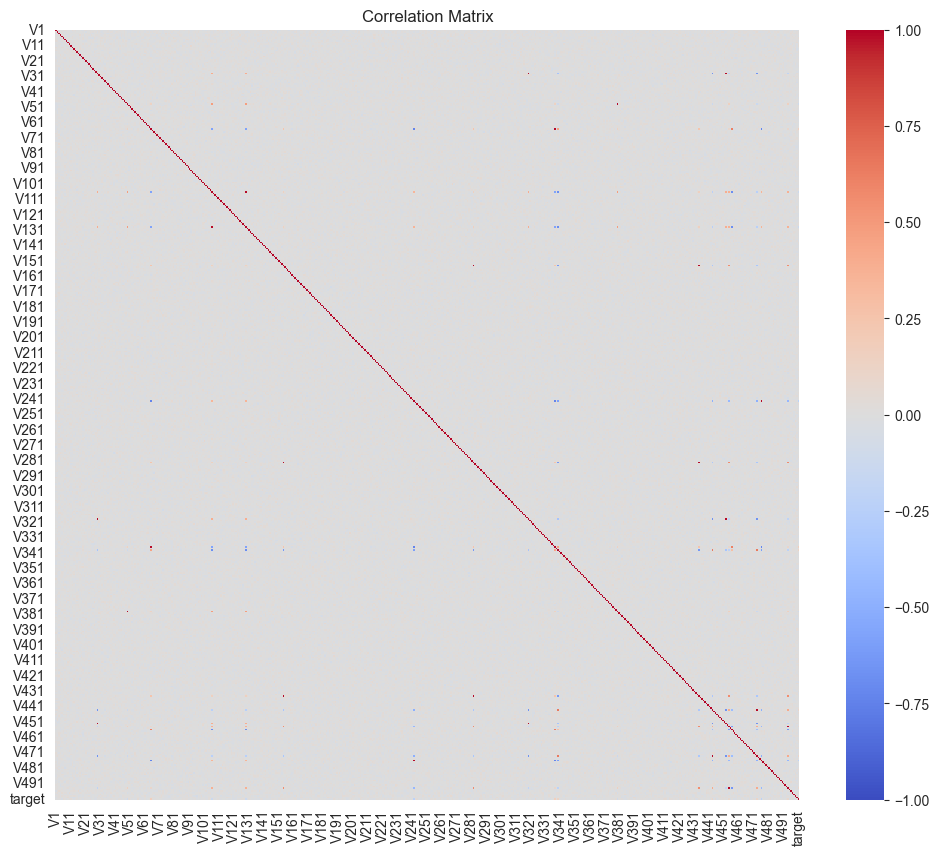

In [16]:
# Correlation
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

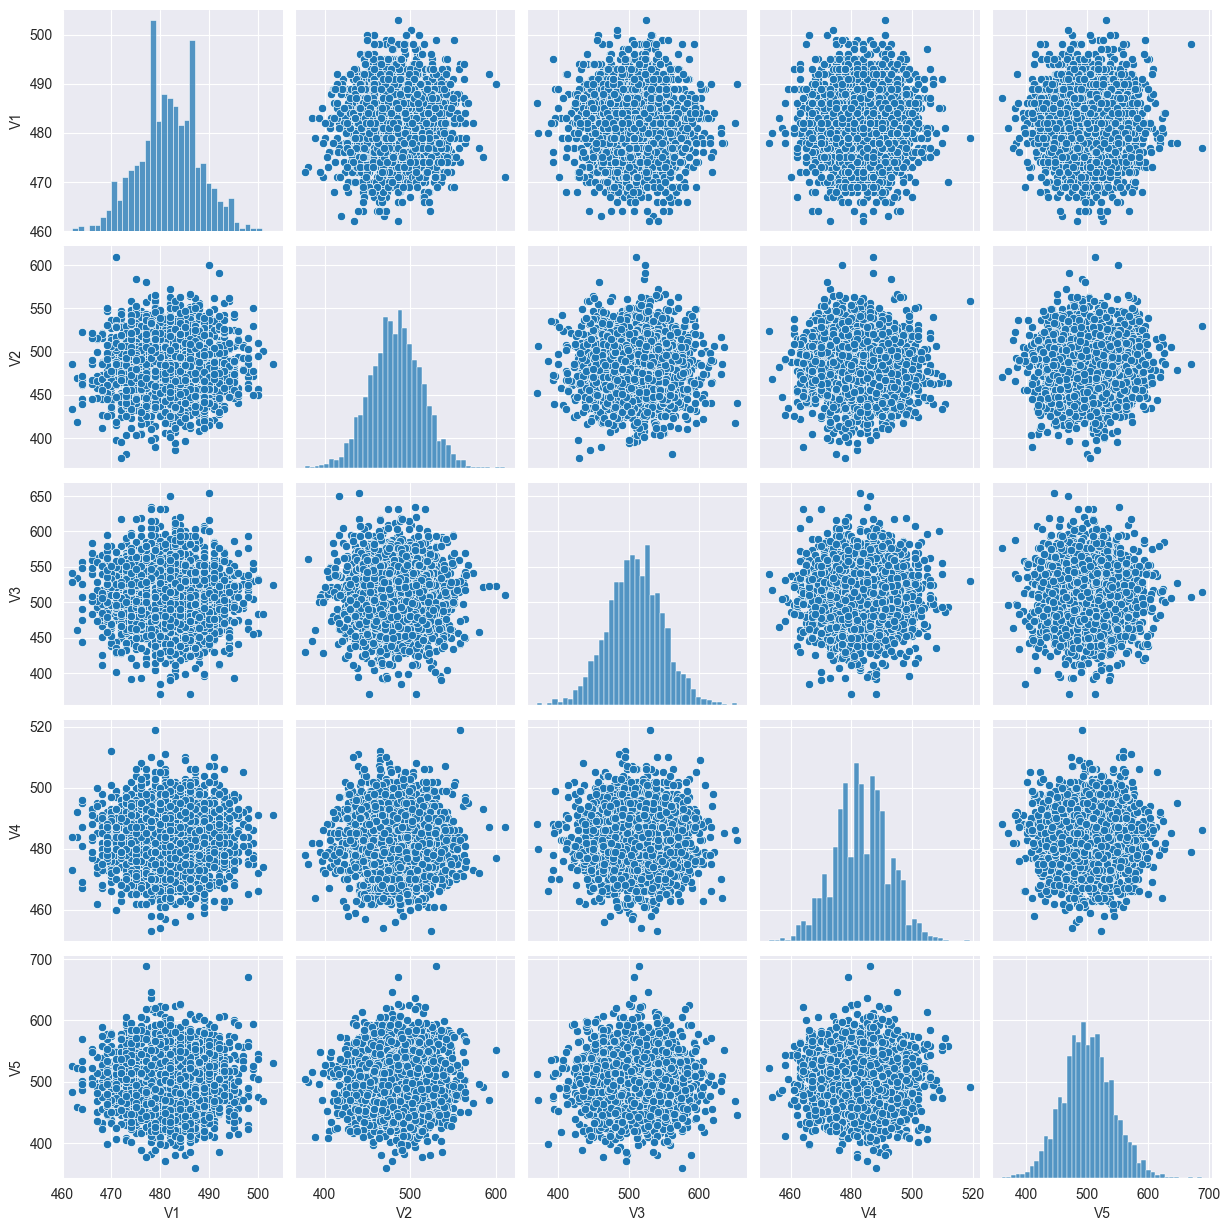

In [12]:
# Correlation for a few first features
subset_features = df.columns[:5]

sns.pairplot(df[subset_features])
plt.show()

### High correlation pairs of features

Num of high correlation pairs: 24


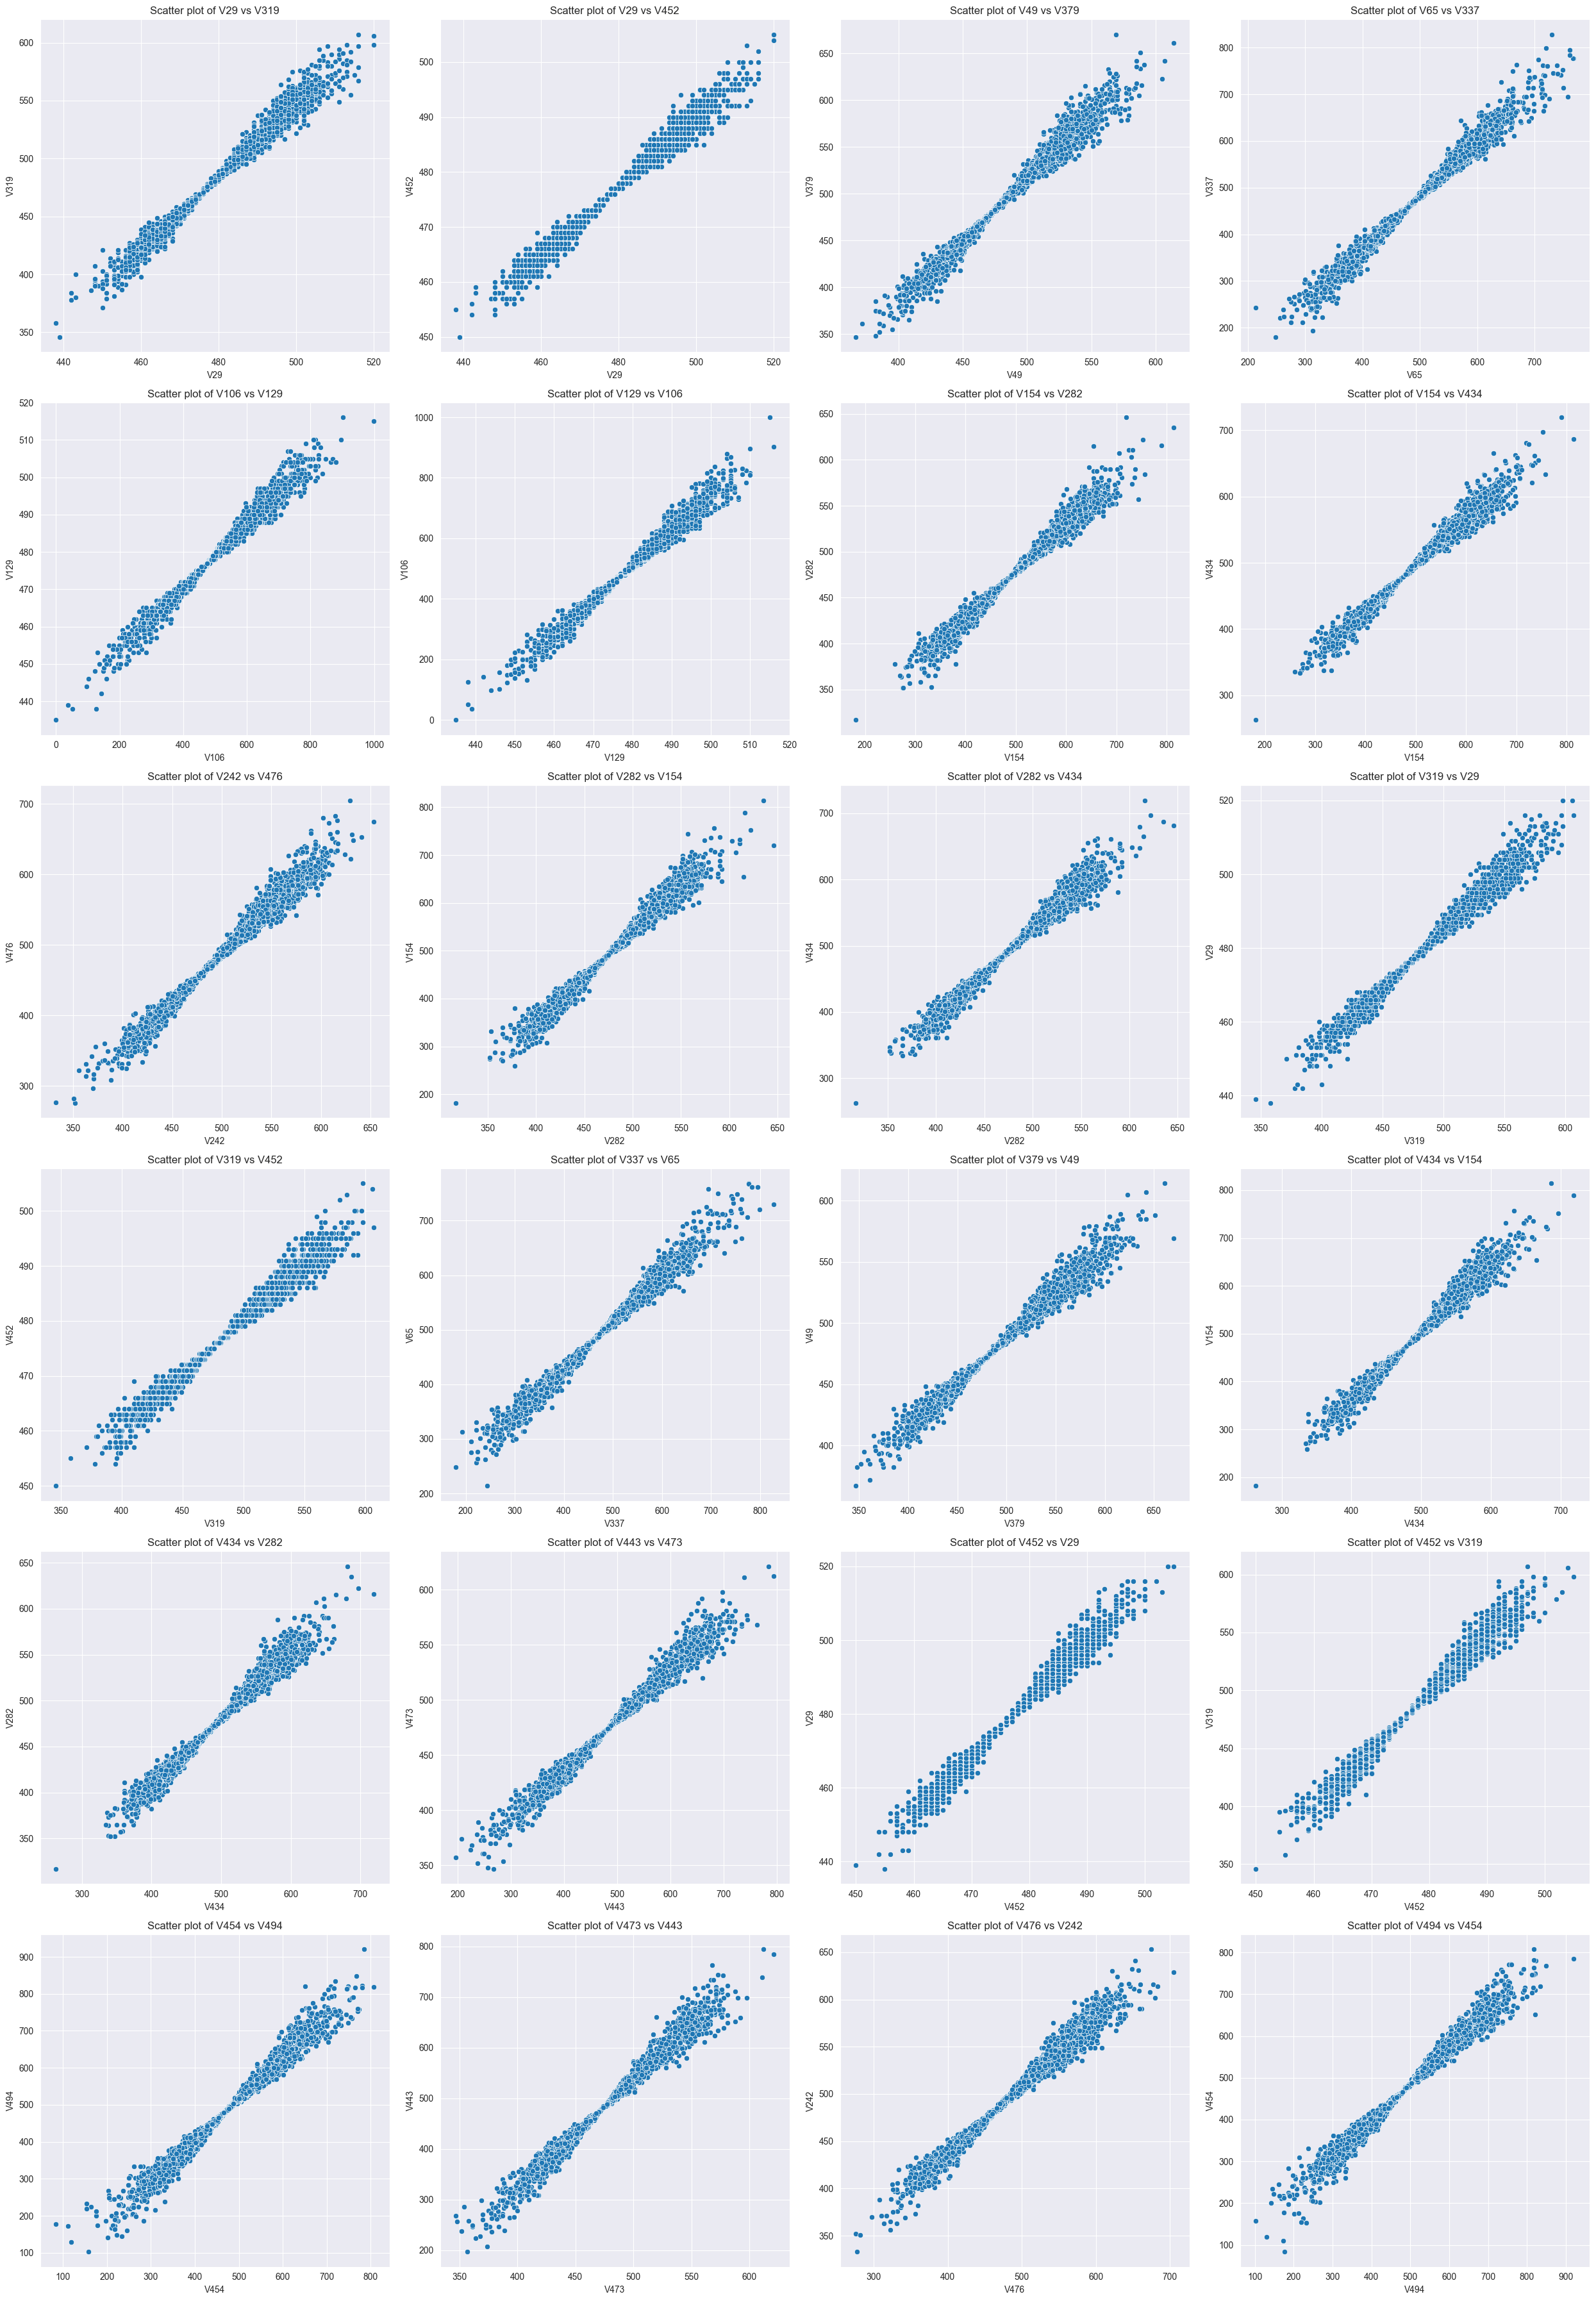

In [35]:
import math

threshold = 0.8

high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns if i != j and abs(corr_matrix.loc[i, j]) >= threshold]

num_plots = len(high_corr_pairs)
print(f'Num of high correlation pairs: {num_plots}')

num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 6))

axes = axes.flatten()

for idx, (i, j) in enumerate(high_corr_pairs):
    sns.scatterplot(x=df[i], y=df[j], ax=axes[idx])
    axes[idx].set_title(f'Scatter plot of {i} vs {j}')
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel(j)

# Delete empty subplots
for idx in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### High correlation triples of features

Number of high correlation pairs: 24


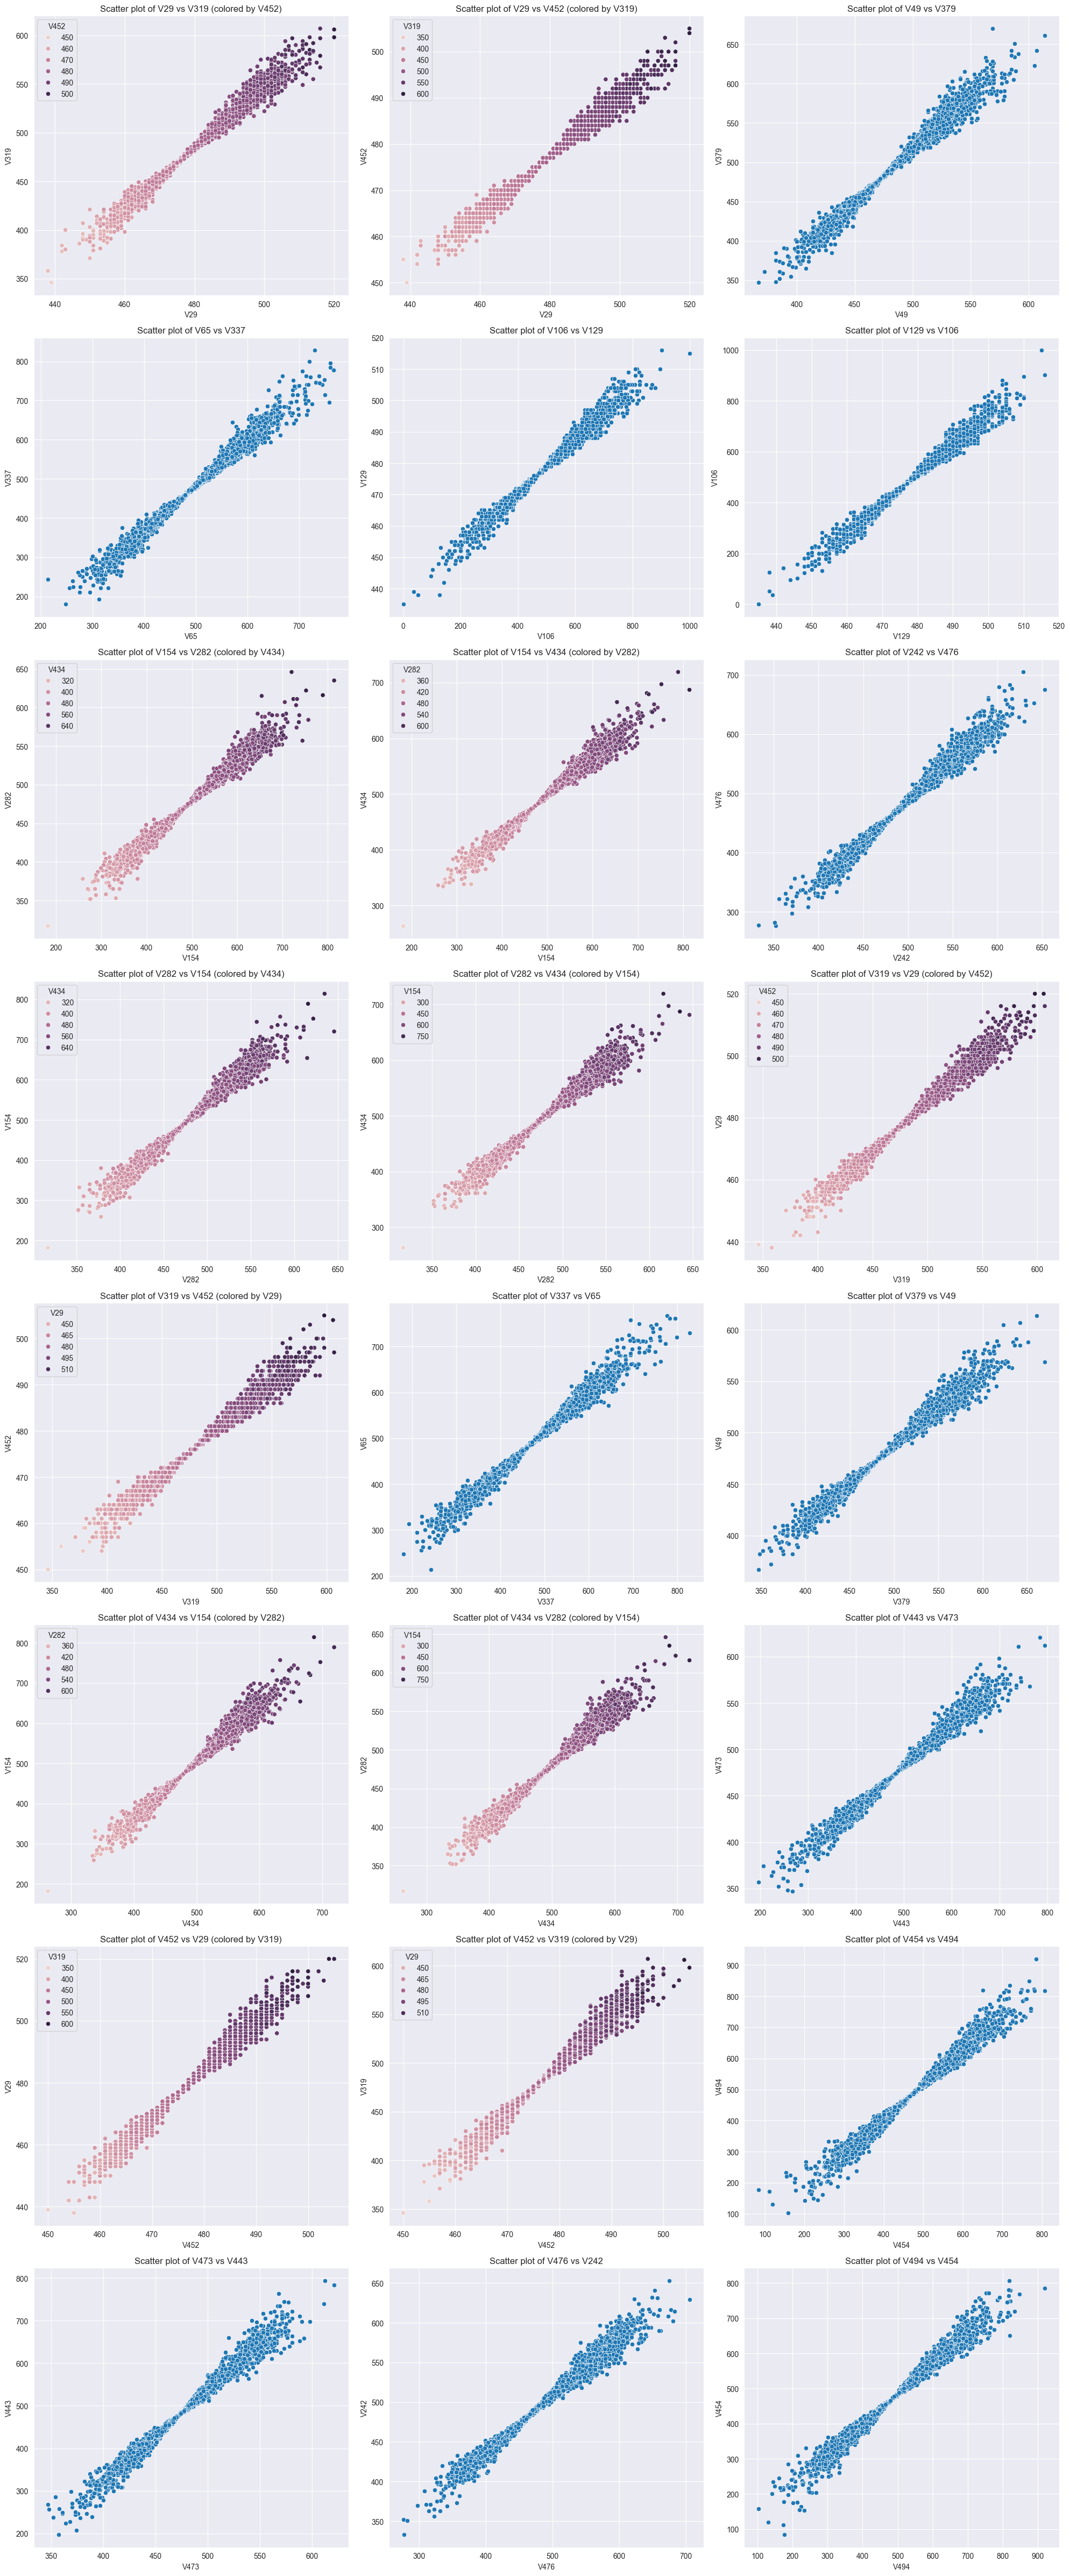

[{'V452', 'V29', 'V319'}, {'V452', 'V29', 'V319'}, {'V434', 'V282', 'V154'}, {'V434', 'V282', 'V154'}, {'V434', 'V282', 'V154'}, {'V434', 'V282', 'V154'}, {'V452', 'V29', 'V319'}, {'V452', 'V29', 'V319'}, {'V434', 'V282', 'V154'}, {'V434', 'V282', 'V154'}, {'V452', 'V29', 'V319'}, {'V452', 'V29', 'V319'}]


In [41]:
num_plots = len(high_corr_pairs)
print(f'Number of high correlation pairs: {num_plots}')

triples = []

num_cols = 3
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

axes = axes.flatten()

for idx, (i, j) in enumerate(high_corr_pairs):
    # Find a third feature that correlates with both i and j
    third_feature = None
    for k in corr_matrix.columns:
        if k != i and k != j and abs(corr_matrix.loc[i, k]) >= threshold and abs(corr_matrix.loc[j, k]) >= threshold:
            third_feature = k
            triples.append({i, j, k})
            break

    if third_feature:
        sns.scatterplot(x=df[i], y=df[j], hue=df[third_feature], ax=axes[idx])
        axes[idx].set_title(f'Scatter plot of {i} vs {j} (colored by {third_feature})')
    else:
        sns.scatterplot(x=df[i], y=df[j], ax=axes[idx])
        axes[idx].set_title(f'Scatter plot of {i} vs {j}')

    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel(j)

# Delete empty subplots
for idx in range(len(high_corr_pairs), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print(triples)

# Test logistic regression accuracy

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5269230769230769
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.57      0.54       257
           2       0.54      0.49      0.51       263

    accuracy                           0.53       520
   macro avg       0.53      0.53      0.53       520
weighted avg       0.53      0.53      0.53       520

